## Hybrid Cryptography Group 4


In [1]:
import random, requests, os, matplotlib.pyplot as plt, cryptography_functions

## Initialisations

Firstly, we must import the required libraries in order to get our code to function properly. 


## File Finding

Next, we define a function called find_file, which searches the directory for a file name that the user inputs, to be encrypted or decrypted. It checks to see whether the file is in the directory or not, and if it is not it prompts the user to try again, and input another name.

In [2]:
#### FINDING FILE IN DIRECTORY ####

def find_file():
    in_directory = False

    while in_directory == False:
        file_name = input("Input the name of the text file you would like to encrypt / decrypt, including the .txt: ")
        if os.path.isfile(file_name): #checks if the inputted file is in the directory
            in_directory = True
        else:
            print("")
            print("The file you inputted is not in the directory, try again")
          
    return file_name

## Caesar Cypher Encryption

We then define a function called caesar_encrypt, which encrypts a message via the Caesar Cypher. This encryption runs through the message letter by letter, shifting each letter a fixed number of places down the alphabet. Naturally, there are 26 ways this can happen, as there are 26 possible shifts due to the length of the English alphabet. This includes a trivial shift, in which the message is shifted 26 places, and is the same as the unencrypted message. 

To do this, the function find_file is run, to allow the user to search for their text file in the directory that they would like to encrypt. This file is then opened, and read to the string variable called message. 

The file encrypted_text is then opened, to be written to. This is where our final Caesar shifted message will be stored on completion of the function. 

The file caesar_shift_value is opened next, also to be written to. This is so the user can know and keep the shift value used to encrypt the message, so that it can later be decrypted. A random number between 1 and 26 inclusive is then generated as the shift value. 

We then define a list called encrypted_message, to which each letter, after it is shifted, will be appended to.

The final message will only contain alphabetic characters, with capitalisation preserved.

## Encryption Process:

To encrypt the message, we iterate through each character in the message via a for loop. This character is then checked to see whether it is in the alphabet, otherwise it will not be encrypted and will not be in the final encrypted message. 

For each alphabetic character in this for loop, it is then checked to see whether it is uppercase or lowercase, and an offset value is set, based on its ASCII value. This will be 65 for uppercase letters, and 97 for lowercase letters. This offset allows us to set the letters A-Z to be indexed as numbers 0 to 25. 

The ASCII value of the character is then offset, to set it to be within that range of 0 to 25, for ease of calculation, and stored to the variable character_offset.

The encryption then happens via this formula:

$$(\text{character_offset}+\text{shift_value}) mod 26 + \text{offset}$$

This shifts the character, by the shift value, takes the modulo 26 of that calculation, such that if the character is greater than 26 (Z), it returns the remainder to add to 0 (A). The offset value is then added back to the now encrypted character, and it is transformed from its ASCII value again to the character that it represents.

This shifted character is then appended to the encrypted_message list, and this occurs for all alphabetic characters in the message.

Then, a variable final_message is created, which joins all the elements of the encrypted_message list into a single string. This string is then written to the encrypted_text file, such that the user now has a text file with their encrypted message. The shift value is also then written to the shift_value file

The files are then all closed, and a message telling the user where their encrypted message and shift value has been written to is displayed.


In [3]:
#### CASESAR CYPHER ##### (maintains case of characters)

def caesar_encrypt(): #defines the caesar encryption function
    
    file_name = find_file()

    input_text = open(file_name,"r") #opens the text file we want to read
    message = input_text.read() #reads the text file to the variable message
    
    encrypted_text = open("encrypted_text.txt","w") #opens the encrypted text file to which we write the encryption
    
    shift_value_file = open("_caesar_shift_value.txt","w")
    shift_value = random.randint(1,26) #generates a shift value between 1 and 26 inclusive
    
    encrypted_message = []
    
    for character in message: #iterates character through each element of the message
        if character.isalpha(): #checks to see if the character is in the alphabet
            
            if character.isupper(): #checks to see if character is uppercase
                offset = 65 #sets appropriate offset value
            else:
                offset = 97
            
            character_offset = ord(character)-offset #offsets character to be between 0 and 25

            encrypted_message.append(chr((character_offset+shift_value)%26+offset))
            #appends our changed letter to the encrypted message list
    

    final_text = "".join(encrypted_message) #turns the list into a string
    encrypted_text.write(final_text) #writes the string to the text file
    shift_value_file.write(str(shift_value))
    shift_value_file.close()
    encrypted_text.close()
    print("")
    print("Encrypted message written to encrypted_text.txt")
    print("Shift value written to caesar_shift_value.txt")
    input_text.close() #closes the files
    
    return 


## Caesar Cypher Decryption

The decryption process of the Caesar Cypher is the inverse function of the encryption process. We do this with a function defined as caesar_decrypt

We initially ask the user which file they would like decrypted, using the find_file function again. This file is then opened and read to the variable cryptic.

The caesar_shift_value file is then found, opened, and read to the variable shift_value

The file decrypted_text is then opened, to be written to. This is where our final decrypted message will be stored on completion of the function.

The list decrypted_message is then defined, and it is to this which we will append each decrypted character.

Again, the final message will only contain alphabetic characters, with capitalisation preserved.

## Decryption Process:

To decrypt the message, we iterate through each character in the cryptic string. It is checked if it is alphabetic, otherwise it will not be decrypted and will not be in the final message.

For each alphabetic character in the cryptic string, it is then checked to see whether it is uppercase or lowercase, and an offset value is set, based on its ASCII value. This will be 65 for uppercase letters, and 97 for lowercase letters. This offset allows us to set the letters A-Z to be indexed as numbers 0 to 25. 

The ASCII value of the character is then offset, to set it to be within that range of 0 to 25, for ease of calculation, and stored to the variable character_offset.

The decryption then happens via this formula:

$$(\text{character_offset} - \text{shift_value}) mod26 + \text{offset}$$

This takes our offset encrypted character, shifts the character by the negative the shift value (the inverse of the encrpytion process), takes the modulo 26 of that to ensure it stays within our range of 0 (A) to 25 (Z), then adds the offset. It is then transformed from that ASCII value to the character that represents. 

This decrypted character is then appended to the decrypted_message list, and this occurs for all alphabetic characters in the message.

Then, a variable final_text is created, which joins all the elements of the decrypted_message list into a single string. This string is then written to the decrypted_text file, such that the user now has a text file with their decrypted message. 

The files are then all closed, and the user is shown a message showing to which file their decrypted message has been written to. 


In [4]:
def caesar_decrypt(): #needs a shift value to decrypt 
    
    file_name = find_file() #lets the user input the file name they would like to read
    
    shift_value_file = open("_caesar_shift_value.txt","r") #opens the shift value file
    shift_value = int(shift_value_file.read()) #read the integer value stored there
    
    encrypted_text = open(file_name,"r") #opens the encrypted text file to read
    cryptic = encrypted_text.read() #sets cryptic to the string value of all the text in encrypted_text.txt
    
    decrypted_text = open("decrypted_text.txt","w") #opens the decrypted text file to write to    

    decrypted_message = []
       
    for character in cryptic: #iterates each character in the cryptic text
        if character.isalpha(): #checks if character is in alphabet
            
            if character.isupper(): #checks if character is uppercase
                offset = 65 #sets appropriate offset
            else:
                offset = 97
            
            character_offset = ord(character)-offset #offsets character to be between 0 and 25
            
            decrypted_message.append(chr((character_offset-shift_value)%26+offset))
            #appends decrypted character to decrypted message list
    
    
        
    final_text = "".join(decrypted_message) #changes the list into a string
    decrypted_text.write(final_text) #writes the string to the text file
    
    decrypted_text.close()  
    encrypted_text.close()#closes the files
    print("")
    print("Decrypted message written to decrypted_text.txt")
    
    return 

## Vigenere Cypher Encryption

We define a function vigenere_encrypt, as our function which encrypts a message via the Vigenere Cypher. The Vigenere Cypher encrypts a message using a keyword and a Caesar Cypher stlye encryption. We start with the first character of the message, and the first character of the keyword. The first character of the keyword is found, and set to be the first letter of the alphabet, and all characters follow in order. i.e, if the first letter were to be "R", the shifted alphabet would be R,S,T,U...Z,A,B,...Q. We then find the position in the  standard alphabet of the first character of the message, and take this positional index and encrypt the character by selecting the letter of the same index in the shifted alphabet. This is repeated for all characters in the message, cycling through each character of the keyword. If the keyword is shorter than the message, then when the final character of the keyword is reached, it loops back to the fist character of the keyword. 

To do this, we first prompt the user to input the name of the text file that they would like to encrypt. This is opened, and read as a list to message_list_unfiltered. This is then filtered, such that only alphabetic characters are in the list, and this list is called message_list

The encrypted_text and key_file files are then opened, both to be written to.

The encrypted_message list is then defined, to which we will append all our encrypted characters. 

Again, this encrypted message will contain only alphabetic characters, with capitalisation preserved. 

## Encryption Process

A random length for our Vigenere keyword is generated, and stored to variable key_length. This is then used to generate key_list, which generates a list of length key_length, containing that amount of random numbers which range from 0 to 25. This is our vigenere keyword. 0 to 25 is used, as it is represents each letter of the alphabet, with 0 representing A and 25 representing Z

Then, we iterate i from 0 to the length of the message_list.

Within this for loop, we find which position of the keyword we are currently at, by taking our iterator (i) modulo the length of our keyword. This is stored to key_pos

$$ \text{key_pos} = i mod \text{len(key_list)}$$

Then, we set the variable character to be the current character of the message which we are encrypting

To preserve capitalisation, this character is checked to see whether it is uppercase or lowercase, and an appropriate offset is set. 65 for uppercase characters, and 97 for lowercase characters. 

Then, the character is offset, to come in line with the 0-25 range to represent each character of the alphabet.

To encrypt the character, the following formula is used:

$$(\text{character_offset}+\text{key_list[key_pos]})mod26 + \text{offset}$$

This adds the shift value, corresponding to the shifted alphabet via the keyword character, takes this modulo 26 to ensure it stays within the alphabetic range of 0 to 25, then adds the offset back to return the corresponding ASCII value

This encrypted ASCII value is then transformed into its character, and appended to the encrypted_message list.

The variable final_text is defined, joining all the encrypted characters into a single string. It is then written to the encrypted_text file.

The keyword is then letter by letter, shifted to 65 such that it can be a capital ASCII value, and then it is transformed into its corresponding character. Each character is then joined together into a long string, and written to the vigenere_key text file. 

The files are then closed, and the user is given a message saying where their encrypted message and vigenere key have been written to. 


In [5]:
#### VIGENERE CYPHER ####
def vigenere_encrypt():
    
    file_name = find_file()
    
    input_text = open(file_name,"r") #opens the text file we want to read
    message_list_unfiltered = list(input_text.read()) #reads the text file to the variable message
    message_list = [x for x in message_list_unfiltered if x.isalpha()] #makes a list of only alphabetical characters
    encrypted_text = open("encrypted_text.txt","w") #opens the encrypted text file to which we write the encryption
    key_file = open("_vigenere_key.txt","w")
   
    
    encrypted_message = []
    key_length = random.randint(129,384) #generates a random length for our keyword
    
    key_list = [random.randint(0,25) for x in range(0,key_length)] #generates a list for our keyword in ASCII
    
    for i in range(0,len(message_list)):

        key_pos =  i%len(key_list) #generates position of where we are in the key
        

        character = message_list[i] #sets character to message character for ease
        if character.isupper(): #checks if y is uppercase in the alphabet
            offset = 65 #sets ASCII offsets
        else: offset = 97

        character_offset = ord(character) - offset #offsets character to be within 0 and 25

        character_encrypted = (character_offset+key_list[key_pos])%26 + offset #encrypts the character 

        encrypted_message.append(chr(character_encrypted)) #appends encrypted character to encrypted message
       
    final_text = "".join(encrypted_message)
    encrypted_text.write(final_text) #writes the final encrypted message to the file
    
    key = "".join(chr(m+65) for m in key_list) #turns keylist into a string
    key_file.write(key) #writes the key to the file
    
    
    encrypted_text.close()
    input_text.close() #closes the files
    key_file.close()
    
    print("Encrypted text written to encrypted_text.txt, and vigenere key written to _vigenere_key.txt")
    
    return      

## Vigenere Cypher Decryption

The decryption process of the Vigenere Cypher is the inverse function of the encryption process. We do this with a function defined as vigenere_decrypt

We initially ask the user which file they would like decrypted, using the find_file function again. This file is then opened and read to the variable cryptic.

The vigenere_key file is then found, opened, and read to the variable key_list, where it is shifted down by 65 to be within the 0 to 25 range for our alphabet

The file decrypted_text is then opened, to be written to. This is where our final decrypted message will be stored on completion of the function.

The list decrypted_message is then defined, and it is to this which we will append each decrypted character.

Again, the final message will only contain alphabetic characters, with capitalisation preserved.

## Decryption Process:

We first iterate from i to the length of the encrypted message, stored as cryptic. 

The current characer is set using the iterator and stored as character.

Within this for loop, we find which position of the keyword we are currently at, by taking our iterator (i) modulo the length of our keyword. This is stored to key_pos

$$ \text{key_pos} = i mod \text{len(key_list)}$$

We then check if the character is uppercase or lowercase, and set an appropriate offset value. 65 for uppercase characters, and 97 for lowercase characters. 

The character is then offset using this. 

Then the character is decrypted via this formula:

$$(\text{character_offset}-\text{key_list[key_pos]})mod26 + \text{offset}$$

This subtracts the shift value obtained via the shifted alphabet corresponding to the current letter in our keyword, then does modulo 26 to ensure we stay within our alphabet range of 0-25, and adds the offset. 

Then the decrypted ASCII value is turned into the corresponding alphabetic character, and appended to the decrypted_message list.

The variable final_text is then defined, joining each element of the decrypted_message to a single long string.

final_text is then written to the decrypted_message file.

The files are then closed, and a message is sent to the user telling them where their decrypted message has been stored. 


In [6]:
def vigenere_decrypt():
    
    file_name = find_file()
    
    key_file = open("_vigenere_key.txt","r") #opens file with key in it to read
    key = key_file.read() #reads the file to key
    key_list = [ord(m) - 65 for m in key] #offsets all values of key to be between 0 and 25
    
    encrypted_text = open(file_name,"r") #opens encrypted text file to read
    cryptic = encrypted_text.read() #reads the file to cryptic
    
    decrypted_text = open("decrypted_text.txt","w") #opens the decrypted text file to write to
    decrypted_message = [] #creates decrypted message list
  
    for i in range(0,len(cryptic)): #iterates through the encrypted message
        character = cryptic[i] #sets character to the current character
        key_pos = i%len(key_list) #sets our position within the key 
        
        if character.isupper(): #checks to see if the character is uppercase
            offset = 65 #sets appropriate offset value
        else:
            offset = 97
            
        character_offset = ord(character)-offset #offsets character to be between 0 and 25
        
        character_decrypted = (character_offset-key_list[key_pos])%26 + offset
        #decrypts the character using the keyword
        
        decrypted_message.append(chr(character_decrypted)) #appends character to decrypted message
        
    final_text = "".join(decrypted_message) #turns decrypted message into a string
    decrypted_text.write(final_text) #writes this string to the decrypted text file
    
    decrypted_text.close() #closes the files
    encrypted_text.close()
    key_file.close()
    print("Decrypted message written to decrypted_text.txt")
    return
    
    
    

## Getting a large text sample

In order to perform frequency analysis, to break the Caesar Cypher, we first need to analyse a large piece of written english text, in order to count the appearances of each letter.

Using the function url_to_text_utf8, we can extract text from the internet, and store it as a string. Below, we take the text from famous English novels, in order to analyse the characters.

The books we have extracted from are: Alice's Adventures in Wonderland, The Great Gatsby, Dracula, Moby Dick and Frankenstein; Or, The Modern Prometheus. This amounts to 2238590 characters 

The function then returns a long string, composed of all of the texts combined. 

In [7]:
#### URL TEXT EXTRACTING ####
def url_to_text_utf8(url):  #### Sourced code from the GitHub repo provided for this project
    '''
    Given a url for a text that is 
    'utf-8' encoded this function 
    returns that text.
    '''
    response = requests.get(url) #gets the URL of the text file
    response.encoding = 'utf-8-sig' #encodes the text file
    return response.text #returns the text file
           
def get_large_text():        
    wonderland = url_to_text_utf8("https://gutenberg.org/cache/epub/11/pg11.txt")[1490:148820]
    gatsby = url_to_text_utf8("https://gutenberg.org/cache/epub/64317/pg64317.txt")[1497:278020]
    dracula = url_to_text_utf8("https://gutenberg.org/cache/epub/345/pg345.txt")[3130:860610]
    moby = url_to_text_utf8("https://gutenberg.org/cache/epub/2701/pg2701.txt")[6000:1241690]
    frankenstein = url_to_text_utf8("https://gutenberg.org/cache/epub/84/pg84.txt")[1440:427680]
    #creates large strings of texts from english books for analysis later

    text = wonderland + gatsby + dracula + moby + frankenstein
    return text

    #text gives us over 2 million characters to analyse (not all may be alphabet though most all are)


## Finding Frequency 

The frequency_finder function takes an input text, and returns an ordered list of the most frequent characters in descending order.

It starts by initialising a dictionary, counts, of the uppercase alphabet ASCII values as keys, and setting the values of each key to zero.

The text is then all made uppercase, such that it can be searched for in the dictionary.

Then, iterating through all the characters in the text, it checks if the character is in the counts dictionary, i.e the character is an alphabet character, then using that character as the key, it increases the value by one. 

After all the characters are iterated through, the dictionary then contains all the letters in the alphabet, and their corresponding frequencies.

Next, the dictionary is sorted by the values of the key, such that the most frequent letter becomes the first entry in the dictionary, and all other letters follow in descending value order. 

A list called frequency is then created, being the list of the ordered keys from the counts dictionary.

The function then returns the list of the most frequent characters in descending order. 

In [8]:
def frequency_finder(text):
    
    counts = {chr(x):0 for x in range(65,91)} #creates a dictionary of all the letters in the alphabet with value 0
    text = text.upper() #makes all text uppercase
    for character in text: #iterates through all the elements of the string "text"
        if character in counts: #checks if the element is an alphabet letter
            counts[character]+=1 #ups the count by one for each letter
    sorted_counts = dict(sorted(counts.items(), key=lambda item: item[1],reverse=True)) #sorts the dictionary by value
    frequency = [x for x in sorted_counts] #creates an ordered list of the letters in decreasing frequency
    return frequency

## Finding Letter Frequency of Large Text

Now we have a function which finds and returns the most frequent letters, we can use it with our large text file to find the most frequent letters in the english language, and their relavent probabilities of appearing. 

We start by setting text to get_large_text, which sets text to be our long string of English words from the novels.

The counts list is initialised, the same as before where each ASCII value for capital letters it input into a dictionary and the value set to zero. 

The text is then set all to uppercase, and a total count is initialised to be set to 0.

Iterating through all the characters, the count is upped by one to get a total count for the alphabetic characters

Then the pct_points_counts is initialised, the same way as the counts dictionary. This dictionary is designed to store the percentage points for each letter's frequency, i.e the probability of appearing in the text. 

The uppercase ASCII keys are iterated through, and the values from the counts dictionary are divided by the total count, and the final result is a dictionary with each letter as a key and the corresponding percentage point.

Then a bar chart is created, to show the frequencies of each letter, for visual aid.

The descending_frequent_letters text file is opened, and the letters in descending order of frequencies are written to it. 

This sets us up for frequency analysis, as we have the letters of the English language, in order of how often they appear in text. 

{'A': 0.0813382530968154, 'B': 0.015772428180238454, 'C': 0.02307211235643865, 'D': 0.04378202350586753, 'E': 0.12486207836182597, 'F': 0.022079076561585642, 'G': 0.020784064969467386, 'H': 0.06501369165412156, 'I': 0.06853376455715428, 'J': 0.00125078732595071, 'K': 0.00849105910416825, 'L': 0.04209882113294529, 'M': 0.026337113986929273, 'N': 0.06876203324414029, 'O': 0.0749226075342068, 'P': 0.01639692842369527, 'Q': 0.0012807168798216735, 'R': 0.05524995644579847, 'S': 0.06410999781112219, 'T': 0.09143076668795984, 'U': 0.028544753617232275, 'V': 0.00937018391040789, 'W': 0.024949633474642522, 'X': 0.0013084128848962963, 'Y': 0.019657016246833945, 'Z': 0.0006017180457341452}


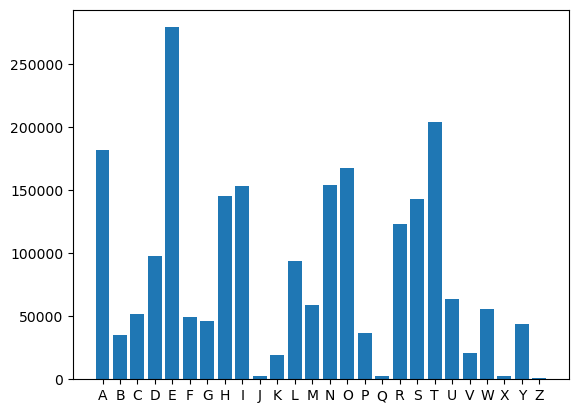

In [9]:
#### GET FREQUENCY OF LETTERS IN ENGLISH LANGUAGE, WRITE TO FILE IN DESCENDING ORDER ####
text = get_large_text()
counts = {chr(x):0 for x in range(65,91)}
text = text.upper()
total_count = 0
for character in text:
    if character in counts:
        counts[character]+=1
        total_count +=1

pct_points_counts = {chr(x):0 for x in range(65,91)}
for key in counts:
    pct_points_counts[key] = counts[key]/total_count
print(pct_points_counts)

letters = list(counts.keys())
appearances = list(counts.values())
plt.bar(range(len(counts)),appearances,tick_label=letters)

plt.show() #shows graph of letter frequencies 

descending_frequencies = open("decsending_frequent_letters.txt","w")
sorted_counts = dict(sorted(counts.items(), key=lambda item: item[1],reverse=True)) #sorts the dictionary by value
frequency = [x for x in sorted_counts] #creates an ordered list of the letters in decreasing frequency
descending_frequencies.write("".join(frequency))
descending_frequencies.close() #writes the most frequent letters in descending order to the file



## Breaking The Caesar Cypher

To break the Caesar Cypher, we use frequency analysis to determine the most frequent letter in the encrypted message, and cross reference this with the list of most frequent characters in the english language. Then using that, iterate through each most frequent letter, starting with the most common "E" and use that as a reference for our shift value. Continue until the message looks like plaintext, and the message is decrypted, and the Cypher is broken. 

With a large enough message size, this function should always work on the first attempt, as "E" will be the most frequent letter in almost every large text file. However, this may not always be the case, hence we do iterate through each most common letter until plaintext is received. 

We start as usual, by prompting the user asking for which file they would like to be decrypted, using the find_file function. This is then opened and read to the variable cryptic.

The decrypted_text file is then opened to be written to.

The descending_frequent_letters file is opened, read, and turned into a list and stored in frequency_list. This is the list of frequent letters generated by the large text from novels.


## Breaking Process:

We start by finding the letter which appears most frequently in the encrypted text. This is done using the frequency_finder function, and that letter is stored to message_most_frequent. 

Then, we set correctness to False. This is to allow the function to continue running until the encrypted message hasbeen decrypted correctly, and plaintext is visible. 

Using a while loop, while correctness is false, we essentially perform Caesar Decryption.

Iterating through the letters in the most frequent letters list, frequency_list, we start Caesar Decryption.

The decrypted_message list is defined, to append our decrypted letters to. 

The shift value is then calculated, by taking the ASCII value of the most frequent letter in the message, and subtracting the ASCII value of the current letter in the frequency list indexed by i, our iterator. 

Then, iterating through each character in cryptic, we first check if the character is alphabetic.

If so, it is then checked whether or not it is uppercase or lowercase, and an appropriate offset value is set. 65 for uppercase, and 97 for lowercase.

The ASCII value of the character is then offset, to set it to be within the range of 0 to 25, for ease of calculation, and stored to the variable character_offset.

The decryption then happens via this formula:

$$(\text{character_offset} - \text{shift_value}) mod26 + \text{offset}$$

This is then appended to the decrypted_message list.

Once all of the characters have been iterated through, the decrypted_message list is joined together as a string, and printed.

The user is then prompted and asked whether the message looks like plaintext or not.

If so, correctness is set to false, and we break out of the for loop. This ends the while loop and the decrypted message is written to the decrypted_text file, and the user is shown a message confirming this.

If the message does not look like plaintext, the loop continues, using the next most frequent letter. 

After plaintext is found, the files are closed. 





In [10]:
##### CAESAR CYPHER BREAK VIA FREQUENCY ANALYSIS ####

def caesar_frequency_break():
    
    #DONT NEED TO RUN FREQUENCY ANALYSIS EVERY TIME, WRITE TO TEXT FILE
    file_name = find_file()
    
    encrypted_text = open(file_name,"r") #opens the encrypted text file to read
    cryptic = encrypted_text.read() #sets cryptic to the string value of all the text in encrypted_text.txt
    
    decrypted_text = open("decrypted_text.txt","w") #opens the decrypted text file to write to  
    
    frequent_letters = open("decsending_frequent_letters.txt","r")    
    frequency_list = list(frequent_letters.read()) #gets the list of the most frequent letters in descending order
    
      
    message_most_frequent = frequency_finder(cryptic)[0] #finds the most frequent letter in the encrypted message
    
    correctness = False 
    while correctness == False: #iterates until plaintext is found
        for i in range(0,len(frequency_list)):
            decrypted_message = []
            
            shift_value = ord(message_most_frequent) - ord(frequency_list[i]) 
            #finds the shift value with corresponding letter of frequency list 
            
            for character in cryptic: #iterates each character in the cryptic text
                if character.isalpha(): #checks if character is in alphabet

                    if character.isupper(): #checks if character is uppercase
                        offset = 65 #sets appropriate offset
                    else:
                        offset = 97

                    character_offset = ord(character)-offset #offsets character to be between 0 and 25

                    decrypted_message.append(chr((character_offset-shift_value)%26+offset))
                    #appends decrypted character to decrypted message list
            print("".join(decrypted_message))
            print("")
            x = input("Does this look like plaintext? Press enter if so, type anything else if not: ")
            if x == "":
                correctness = True
                print("")
                print("Plaintext written to decrypted_text.txt")
                break
            else:
                continue
    decrypted_text.write("".join(decrypted_message)) #writes the plaintext to decrypted_text
    decrypted_text.close()
    encrypted_text.close()
    frequent_letters.close() #closes the files
    return
    
    